<a href="https://colab.research.google.com/github/ArnavGhosh999/COHORT--AIML/blob/main/ButterflyImage_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [14]:
import pandas as pd

# Loading training and testing datasets
train_df = pd.read_csv('/content/Training_set.csv')
test_df = pd.read_csv('/content/Testing_set.csv')


In [15]:
df = pd.concat([train_df, test_df], ignore_index=True)


In [56]:

print("Training set:")
print(train_df.head())

print("Testing set:")
print(test_df.head())


Training set:
Empty DataFrame
Columns: [filename, label, image]
Index: []
Testing set:
Empty DataFrame
Columns: [filename, image]
Index: []


In [16]:
df

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
9280,Image_2782.jpg,NaN
9281,Image_2783.jpg,NaN
9282,Image_2784.jpg,NaN
9283,Image_2785.jpg,NaN


In [17]:
df.isna()

,filename,label
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
9280,False,True
9281,False,True
9282,False,True
9283,False,True


In [18]:
df.dropna(inplace = True)

In [19]:
df

,filename,label
0,Image_1.jpg,SOUTHERN DOGFACE
1,Image_2.jpg,ADONIS
2,Image_3.jpg,BROWN SIPROETA
3,Image_4.jpg,MONARCH
4,Image_5.jpg,GREEN CELLED CATTLEHEART
...,...,...
6494,Image_6495.jpg,MANGROVE SKIPPER
6495,Image_6496.jpg,MOURNING CLOAK
6496,Image_6497.jpg,APPOLLO
6497,Image_6498.jpg,ELBOWED PIERROT


<Axes: >

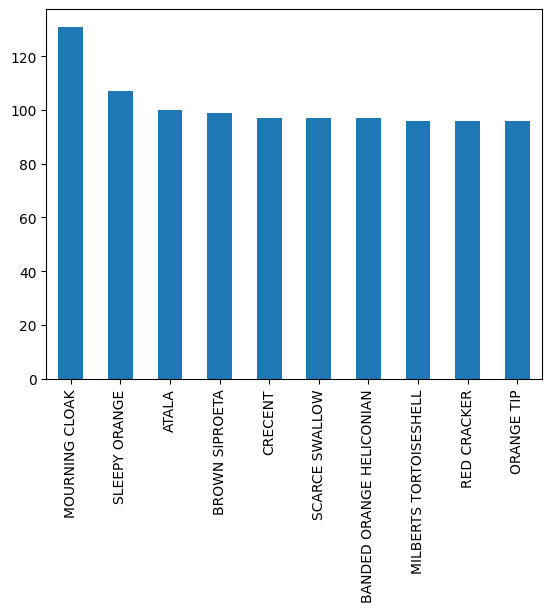

In [20]:
df['label'].value_counts().head(10).plot(kind='bar')

In [25]:
import os
import tensorflow as tf

os.environ["KERAS_BACKEND"] = "tensorflow"

import keras
from keras import layers
from keras import backend

import tensorflow_datasets as tfds

tfds.disable_progress_bar()

In [37]:
# prompt: give me the code to prepare the image

def prepare_image(image):
  image = tf.image.decode_jpeg(image, channels=3)
  image = tf.image.resize_with_pad(image, 100, 100)
  return image


In [50]:

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])


In [51]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [54]:
import pandas as pd  # For handling data with DataFrames
import tensorflow as tf  # For building and training the neural network
from tensorflow.keras import layers  # For building the neural network layers


In [68]:
# prompt: show the tabular data for my training_Set

print("Training set:")
print(train_df.head())


Training set:
Empty DataFrame
Columns: [filename, label, image]
Index: []


In [ ]:
train